In [263]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [264]:
df = pd.read_csv('Data.csv', encoding='cp1250')

In [265]:
df.columns

Index(['Kód okresu', 'Název okresu', 'Věk', 'Pohlaví', 'Rodinný stav',
       'Nejvyšší dosažené vzdělání', 'Počet osob'],
      dtype='object')

In [266]:
df.head()

,Kód okresu,Název okresu,Věk,Pohlaví,Rodinný stav,Nejvyšší dosažené vzdělání,Počet osob
0,CZ0201,Benešov,0,muž,Svobodný/svobodná,nedefinováno - osoby ve věku 0–14 let,507
1,CZ0201,Benešov,0,žena,Svobodný/svobodná,nedefinováno - osoby ve věku 0–14 let,504
2,CZ0201,Benešov,1,muž,Svobodný/svobodná,nedefinováno - osoby ve věku 0–14 let,513
3,CZ0201,Benešov,1,žena,Svobodný/svobodná,nedefinováno - osoby ve věku 0–14 let,538
4,CZ0201,Benešov,2,muž,Svobodný/svobodná,nedefinováno - osoby ve věku 0–14 let,565


In [267]:
df.dtypes

Kód okresu                    object
Název okresu                  object
Věk                           object
Pohlaví                       object
Rodinný stav                  object
Nejvyšší dosažené vzdělání    object
Počet osob                     int64
dtype: object

In [268]:
df['Nejvyšší dosažené vzdělání'].unique()

array(['nedefinováno - osoby ve věku 0–14 let', 'bez vzdělání',
       'nedokončené základní vzdělání', 'základní vzdělání', 'nezjištěno',
       'střední nebo vyučení (bez maturity)',
       'úplné střední všeobecné (s maturitou)',
       'úplné střední odborné (s maturitou)', 'konzervatoř',
       'nástavbové/zkrácené studium, absolvování dvou a více oborů středních škol',
       'pomaturitní studium', 'bakalářské', 'vyšší odborné vzdělání',
       'magisterské', 'doktorské'], dtype=object)

# Pohlaví vzdělání

In [269]:
df.groupby('Pohlaví')

In [270]:
df.shape

(404968, 7)

In [271]:
def split_by(df: pd.DataFrame, column: str) -> list:
    return [df[df[column] == column_type]['Věk'] for column_type in df[column].unique()]

In [272]:
def convert_age_to_int(s: str) -> int:
    return 100 if s.endswith('+') else int(s)
df['Věk'] = df['Věk'].apply(convert_age_to_int)

In [273]:
education = pd.DataFrame(columns=['Věk', 'Pohlaví', 'Vysokoškolsky vzdělaný', 'Počet osob', 'Poměr vzdělaných'])
for age in df['Věk'].unique():
    df_age = df[df['Věk'] == age]
    for gender in ('muž', 'žena'):
        df_gender = df_age[df_age['Pohlaví'] == gender]
        total = df_gender['Počet osob'].astype(int).sum()
        educated = df_gender[df_gender['Nejvyšší dosažené vzdělání'].isin(['bakalářské', 'vyšší odborné vzdělání', 'magisterské', 'doktorské'])]['Počet osob'].astype(int).sum()
        percentage_educated = educated / total * 100
        new_row = pd.DataFrame([[age, gender, educated, total, percentage_educated]], columns = education.columns)
        if education.empty:
            education = new_row
        else:
            education = pd.concat([education, new_row])

df_edu = education.pivot(index = 'Věk', columns = 'Pohlaví', values = 'Vysokoškolsky vzdělaný')
df_pop = education.pivot(index = 'Věk', columns = 'Pohlaví', values = 'Počet osob')
df_perc = education.pivot(index = 'Věk', columns = 'Pohlaví', values = 'Poměr vzdělaných')

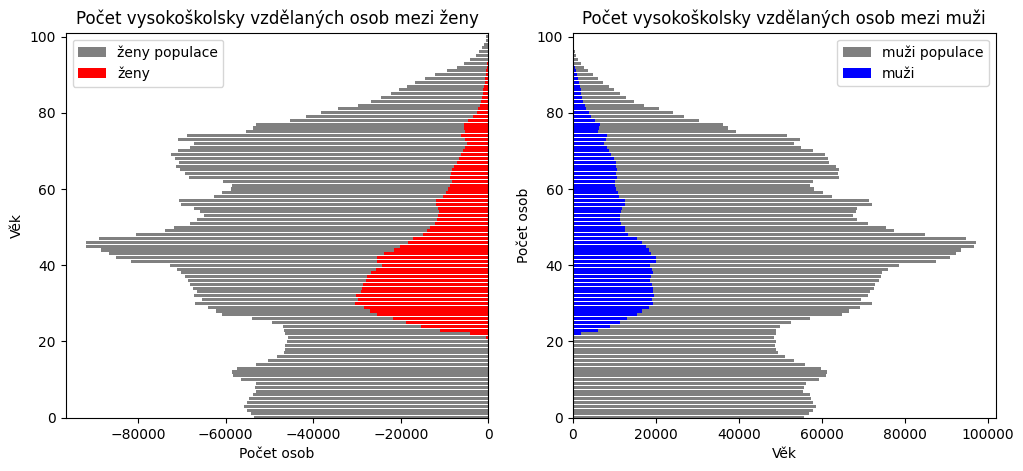

In [303]:
ages = df_edu.index
male = df_edu.get('muž')
female = df_edu.get('žena')
male_pop = df_pop.get('muž')
female_pop = df_pop.get('žena')
y = np.arange(len(ages))
height = 0.8
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.barh(y = y, width = -female_pop, height = height, label = 'ženy populace', color = 'grey')
ax1.barh(y = y, width = -female, height = height, label = 'ženy', color = 'red')
ax1.set_ylim(0, 101)
ax1.set_ylabel('Věk')
ax1.set_xlabel('Počet osob')
ax1.legend()
ax1.set_title('Počet vysokoškolsky vzdělaných osob mezi ženy')

ax2.barh(y = y, width = male_pop, height = height, label = 'muži populace', color = 'grey')
ax2.barh(y = y, width = male, height = height, label = 'muži', color = 'blue')
ax2.set_ylim(0, 101)
ax2.set_xlabel('Věk')
ax2.set_ylabel('Počet osob')
ax2.legend()
ax2.set_title('Počet vysokoškolsky vzdělaných osob mezi muži')

plt.show()

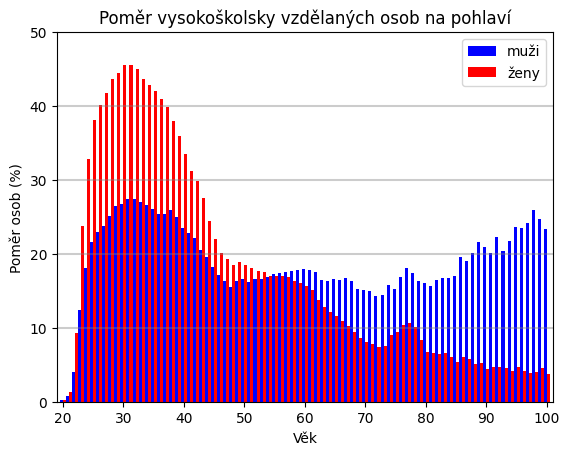

In [296]:
ages = df_perc.index
male = df_perc.get('muž')
female = df_perc.get('žena')
x = np.arange(len(ages))
width = 0.5
plt.hlines(np.arange(10, 100, 10), xmin = 0, xmax = 200, color = 'grey', alpha = 0.4)
plt.bar(x = x - width / 2, height = male, width = width, label = 'muži', color = 'blue')
plt.bar(x = x + width / 2, height = female, width = width, label = 'ženy', color = 'red')
plt.xlim(19, 101)
plt.ylim(0, 50)
plt.xlabel('Věk')
plt.ylabel('Poměr osob (%)')
plt.title('Poměr vysokoškolsky vzdělaných osob na pohlaví')
plt.legend()
plt.show()

In [304]:
plt.barh?

Signature:
plt.barh(
    y: 'float | ArrayLike',
    width: 'float | ArrayLike',
    height: 'float | ArrayLike' = 0.8,
    left: 'float | ArrayLike | None' = None,
    *,
    align: "Literal['center', 'edge']" = 'center',
    data=None,
    **kwargs,
) -> 'BarContainer'
Docstring:
Make a horizontal bar plot.

The bars are positioned at *y* with the given *align*\ment. Their
dimensions are given by *width* and *height*. The horizontal baseline
is *left* (default 0).

Many parameters can take either a single value applying to all bars
or a sequence of values, one for each bar.

Parameters
----------
y : float or array-like
    The y coordinates of the bars. See also *align* for the
    alignment of the bars to the coordinates.

width : float or array-like
    The width(s) of the bars.

    Note that if *left* has units (e.g. datetime), *width* should be in
    units that are a difference from the value of *left* (e.g. timedelta).

height : float or array-like, default: 0.8
    The heigh